In [5]:
# se importan las librerias a utilizar
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [ ]:
# Se desactiva los "Warnings"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)   ####para desabilitar los warnings

In [2]:
# Se importa el archivo train.csv  
train_df=pd.read_csv('Datasets\hospitalizaciones_train.csv', encoding='utf-8')
train_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [3]:
# Se agrega una columna "estadia" como resultado de la binarizacion de la columna "Stay (in days)"
train_df['estadia'] = np.where(train_df['Stay (in days)']>8,1,0)

In [4]:
# Se elimina columna "Stay (in days)"
train_df.drop(columns='Stay (in days)', inplace=True)

In [6]:
# Se convierte columnas categoricas a numericas
le = preprocessing.LabelEncoder()
train_df['Insurance'] = le.fit_transform(train_df['Insurance'])
train_df['health_conditions'] = le.fit_transform(train_df['health_conditions'])
train_df['Type of Admission'] = le.fit_transform(train_df['Type of Admission'])
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['doctor_name'] = le.fit_transform(train_df['doctor_name'])
train_df['Ward_Facility_Code'] = le.fit_transform(train_df['Ward_Facility_Code'])
train_df['Department']=le.fit_transform(train_df['Department'])

In [7]:
# Se convierte columnas categoricas ordinales en numericas
enc = OrdinalEncoder()
train_df['Age'] = enc.fit_transform(train_df[['Age']])
train_df['Severity of Illness'] = enc.fit_transform(train_df[['Severity of Illness']])

In [8]:
# Se define la funcion para graficar un mapa de calor de las correlaciones
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

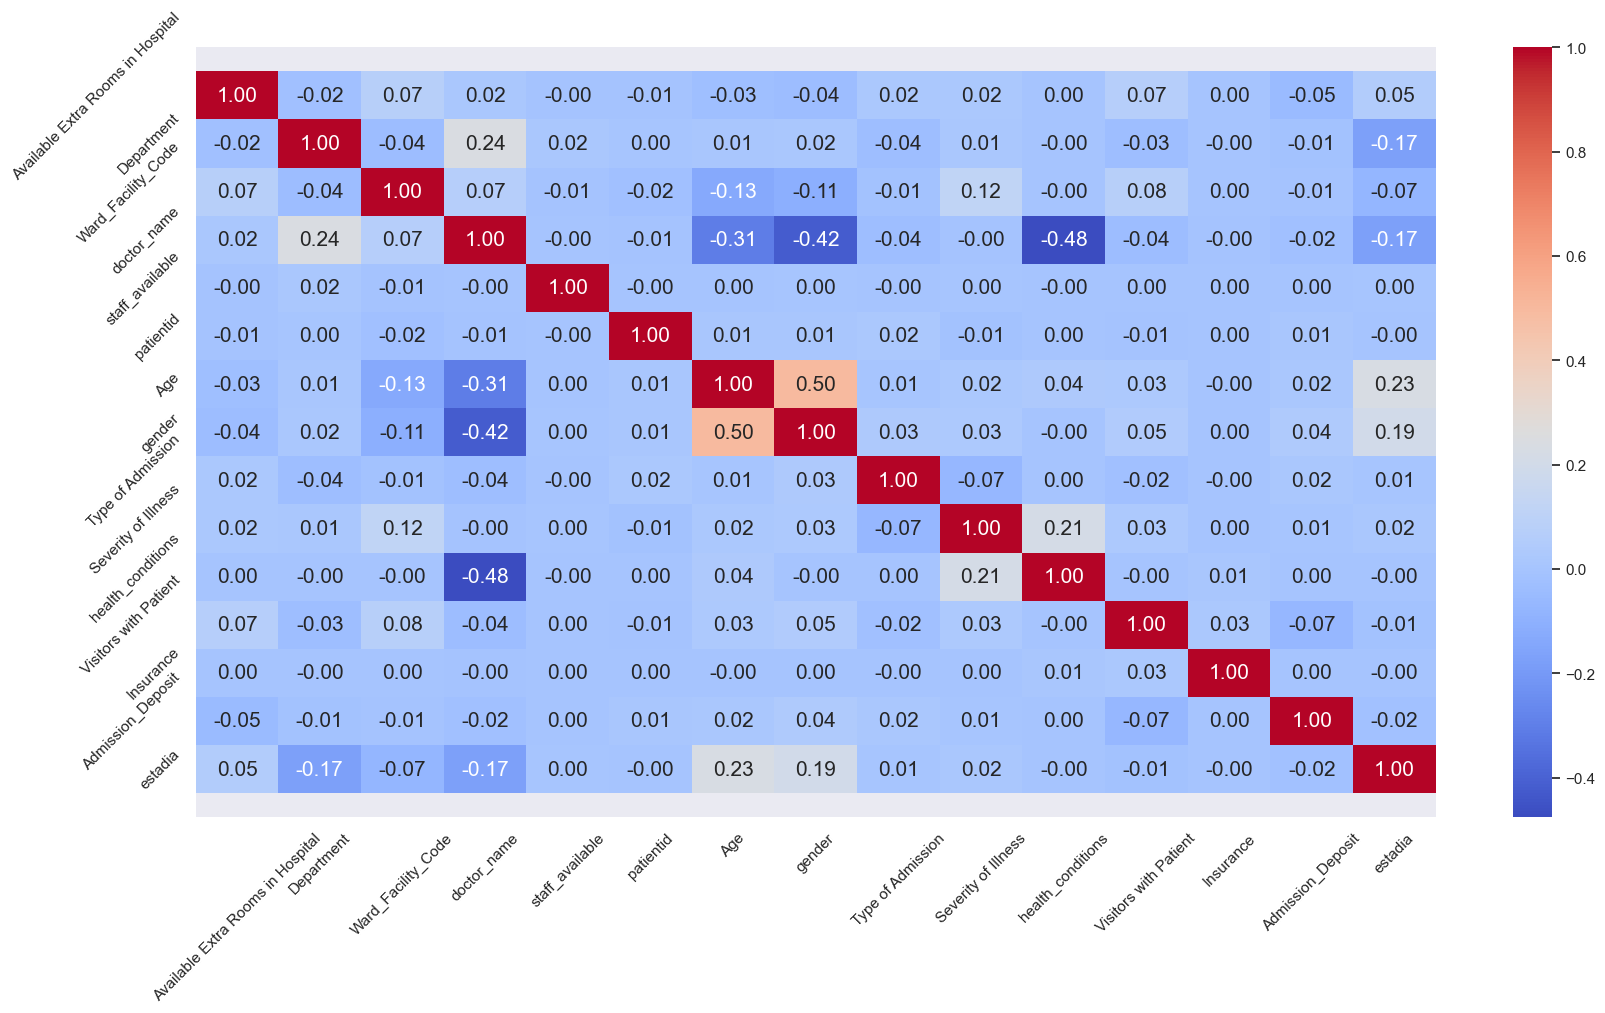

In [9]:
# Se asigna una variable la correlacion del dataframe de entrenamiento y se procede a graficarla
corr = train_df.corr()
plot_corre_heatmap(corr)

In [10]:
# Se eliminan las columnas que se consideran innecasarias por tener correlacion baja o nula
train_df.drop(columns=['staff_available', 'patientid', 'Visitors with Patient'], inplace=True)

In [11]:
# Se verifica como quedaron las columnas
train_df

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,estadia
0,4,2,3,8,4.0,0,1,0.0,1,1,2966.408696,0
1,4,2,1,8,3.0,0,1,1.0,2,0,3554.835677,1
2,2,2,1,8,2.0,0,1,0.0,1,1,5624.733654,0
3,4,2,3,4,3.0,0,2,2.0,4,0,4814.149231,0
4,2,1,4,2,7.0,1,1,2.0,1,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,3,6,3.0,0,1,1.0,0,1,3902.291076,0
409996,5,2,3,3,2.0,0,1,0.0,5,0,4771.995223,1
409997,4,2,3,6,2.0,0,0,1.0,0,1,3816.994210,1
409998,10,2,3,4,2.0,0,1,2.0,5,1,3841.577491,1


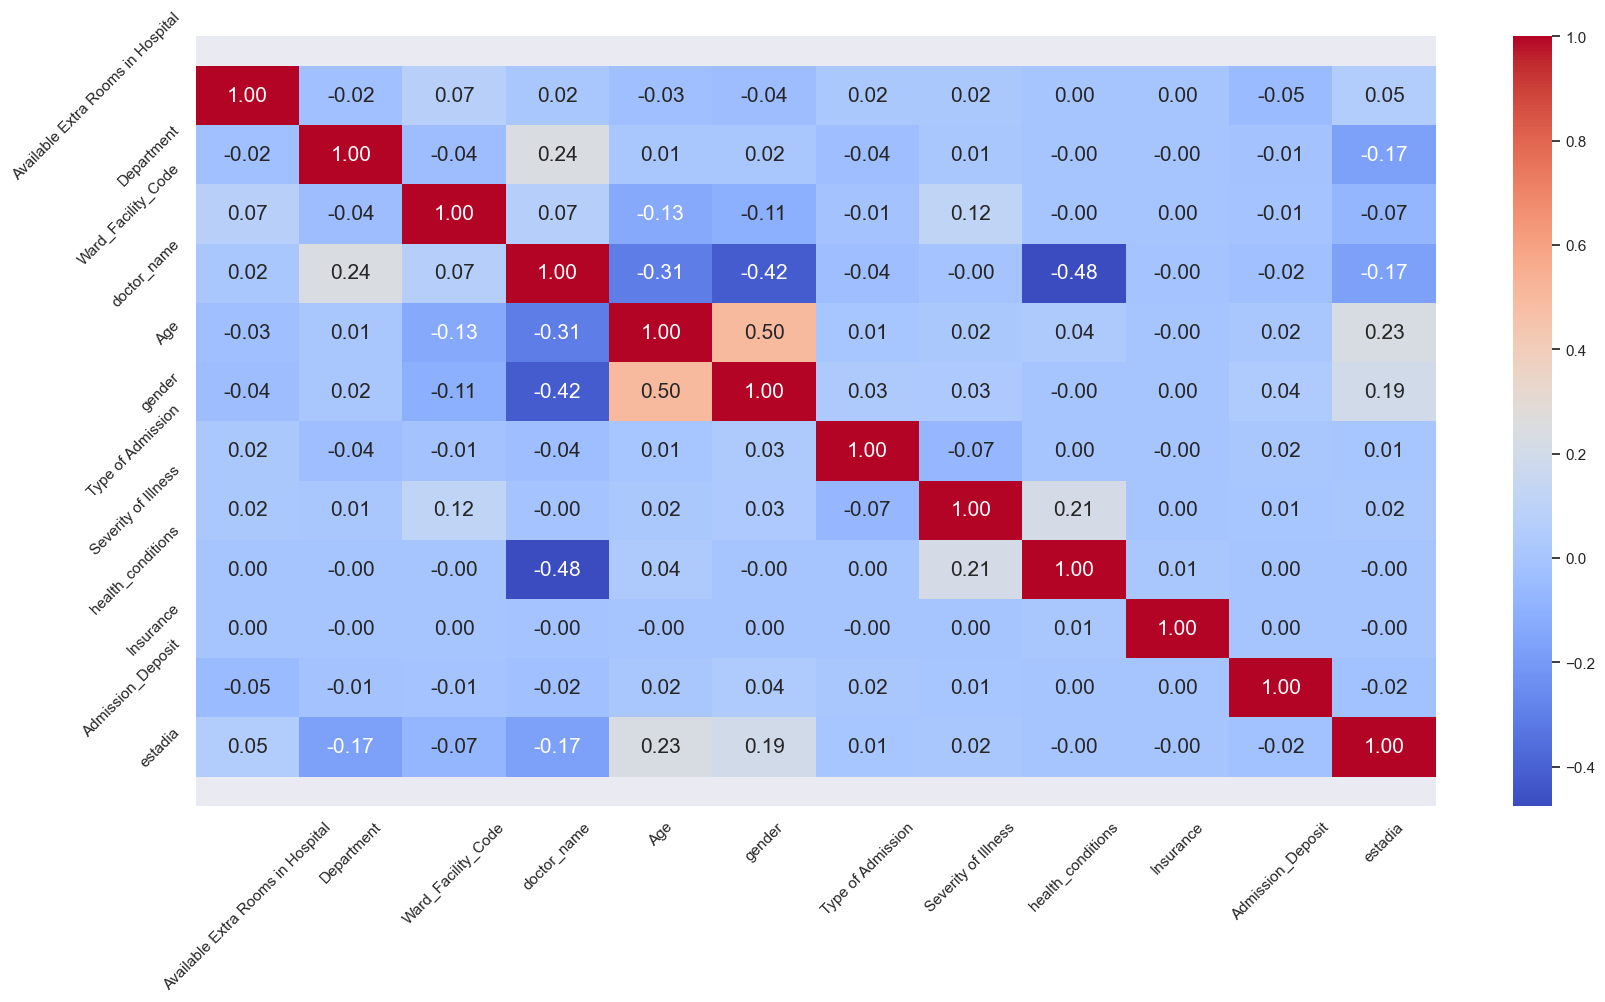

In [12]:
# Se vuelve a graficar el mapa de calor de las correlaciones por si al eliminar columnas generaba un cambio
corr = train_df.corr()
plot_corre_heatmap(corr)

In [13]:
# Se eliminan las columnas que se consideran innecasarias como train_df
train_df.drop(columns=['Insurance', 'health_conditions'], inplace=True)

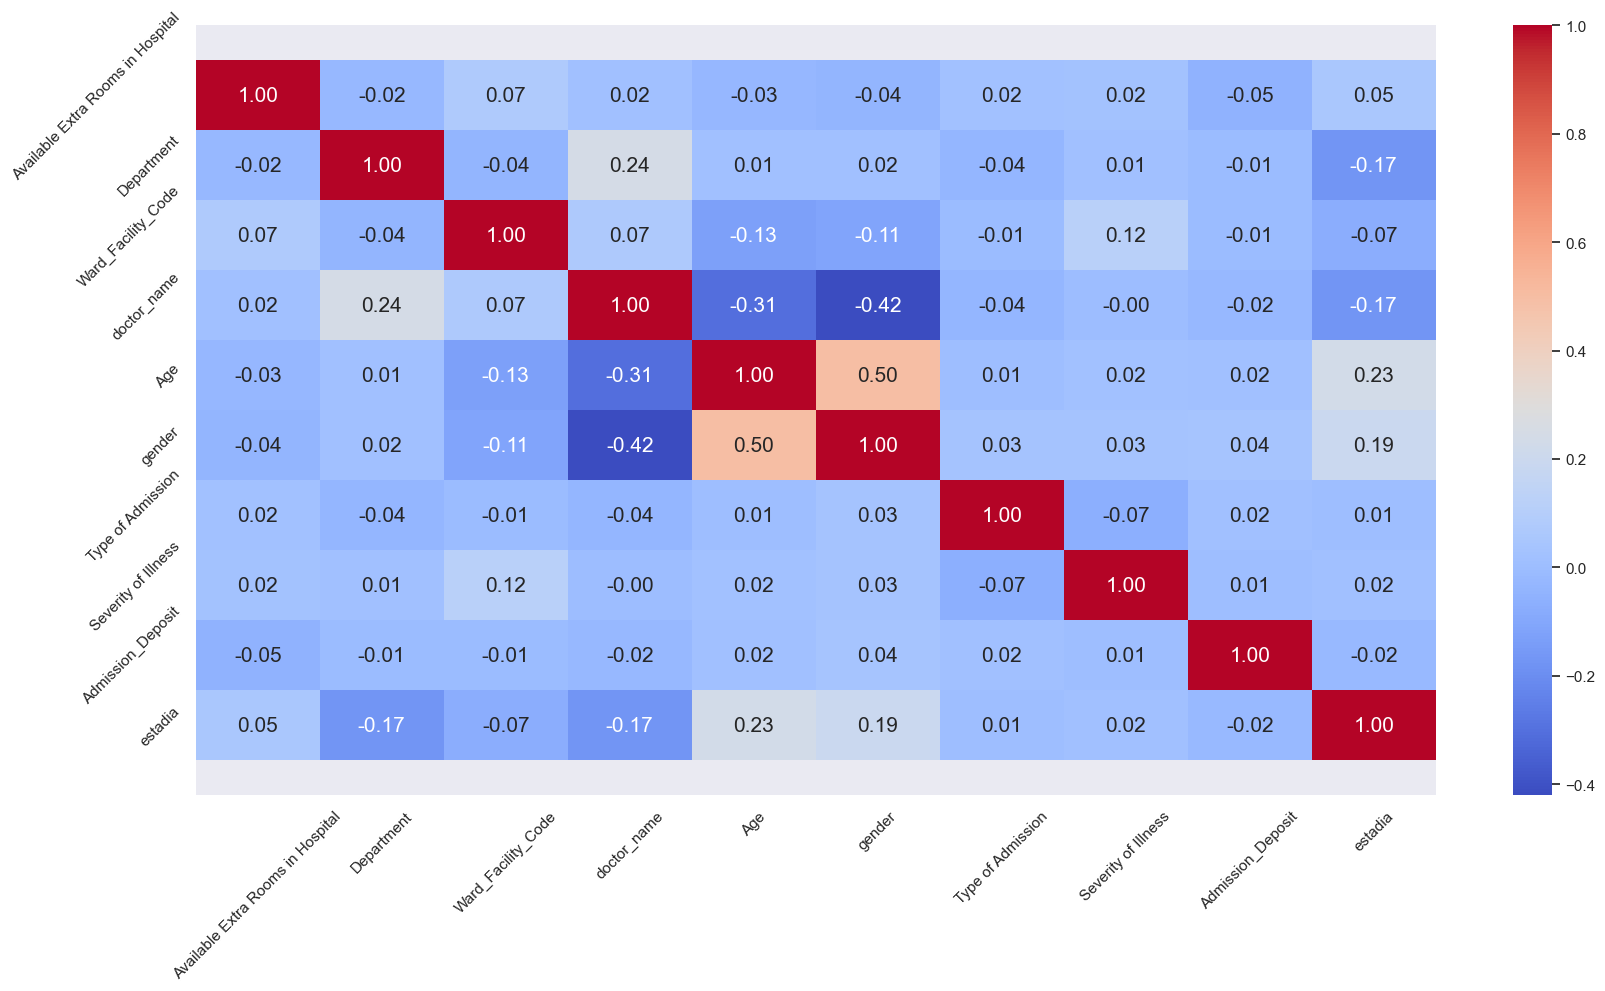

In [14]:
corr = train_df.corr()
plot_corre_heatmap(corr)

In [46]:
X=train_df.iloc[:,0:8]
y=train_df.iloc[:,9]

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)       

In [48]:
# Realizo partición de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [49]:
# Entrenamos

clf.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
# Predecimos

y_pred = clf.predict(X_test)
yy_train_pred=clf.predict(X_train)

In [55]:
# Evaluamos

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.6718439024390244


## Aplico matriz de confucion para revalidar los datos

In [56]:
# Se importan libreria necesaria
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)


In [58]:
matrix = confusion_matrix(y_train, yy_train_pred)
matrix_2 = confusion_matrix(y_test, y_pred)

In [59]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

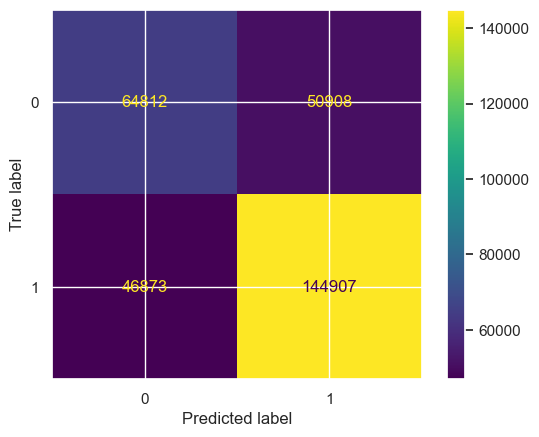

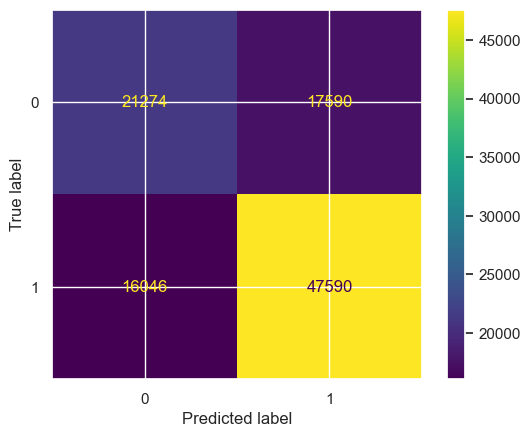

In [60]:
cm_display.plot()
plt.show()
cm_display_2.plot()
plt.show()

In [61]:
# Exploramos el nivel de accuracy, recall y f1score
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1score:", metrics.f1_score(y_test,y_pred))

accuracy:  0.6718439024390244
Recall:  0.7478471305550317
F1score: 0.738883368525649


In [65]:
# Se importa el archivo hospitalizaciones_test.csv para luego generarle las mismas transformaciones
test_df=pd.read_csv('Datathon-main\hospitalizaciones_test.csv', encoding='utf-8')
test_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [66]:
# Se convierte columnas categoricas a numericas
le = preprocessing.LabelEncoder()
test_df['Department']=le.fit_transform(test_df['Department'])   #columna del dtf test
test_df['Insurance'] = le.fit_transform(test_df['Insurance'])
test_df['health_conditions'] = le.fit_transform(test_df['health_conditions'])
test_df['Type of Admission'] = le.fit_transform(test_df['Type of Admission'])
test_df['gender'] = le.fit_transform(test_df['gender'])
test_df['doctor_name'] = le.fit_transform(test_df['doctor_name'])
test_df['Ward_Facility_Code'] = le.fit_transform(test_df['Ward_Facility_Code'])

In [67]:
# Se convierte columnas categoricas ordinales en numericas
enc = OrdinalEncoder()
test_df['Age'] = enc.fit_transform(test_df[['Age']])
test_df['Severity of Illness'] = enc.fit_transform(test_df[['Severity of Illness']])

In [68]:
# Se eliminan columnas innecesarias
test_df.drop(columns=['staff_available', 'patientid', 'Visitors with Patient','Insurance','health_conditions',], inplace=True)

In [70]:
# Reviso como queda armado el dataframe test
test_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,Admission_Deposit
0,3,2,5,4,2.0,0,1,2.0,4749.640225
1,2,0,4,1,5.0,0,1,2.0,4122.261324
2,2,3,4,1,5.0,2,1,2.0,5459.067882
3,2,2,5,4,2.0,0,1,2.0,3987.033318
4,2,1,0,1,5.0,0,1,0.0,4770.789695


In [71]:
# Defino mi conjunto para hacer la prediccion
X1=test_df.iloc[:,0:8]  

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)       

In [74]:
# Entrenamos

clf.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred_t=clf.predict(X1)

c:\Users\Hector\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [76]:
#volvemos el array dataframe
df_pred = pd.DataFrame(y_pred_t)


In [77]:
#nombramos columna
df_pred = df_pred.rename(columns={0:'pred'})


In [ ]:
#exportamos a csv
df_pred.to_csv('ArgumedoHector.csv', index=False)

## No termino usando este modelo ya que los valores resultantes no mejoran al del modelo de Arbol